In [1]:
import torch
from functions.train_test import test
from models.vit import ViT
from models.CNN_ViT import CNN_ViT
from functions.helpers import count_parameters
from functions.plotter import plot_feature_maps, plot_loss_accuracy
import functions as f


In [2]:
torch.manual_seed(42)

CIFAR-100


In [5]:
train_loader, test_loader = f.data_loader.get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


CNN+ViT

Total parameters:671396
Test Accuracy: 54.01%


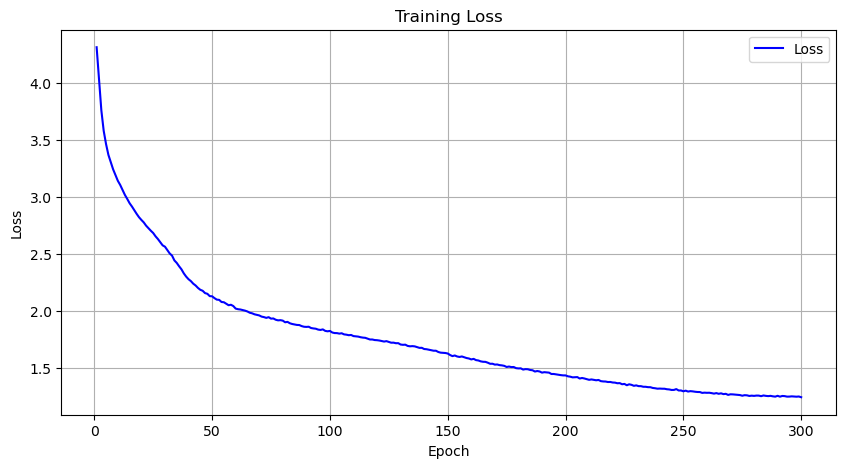

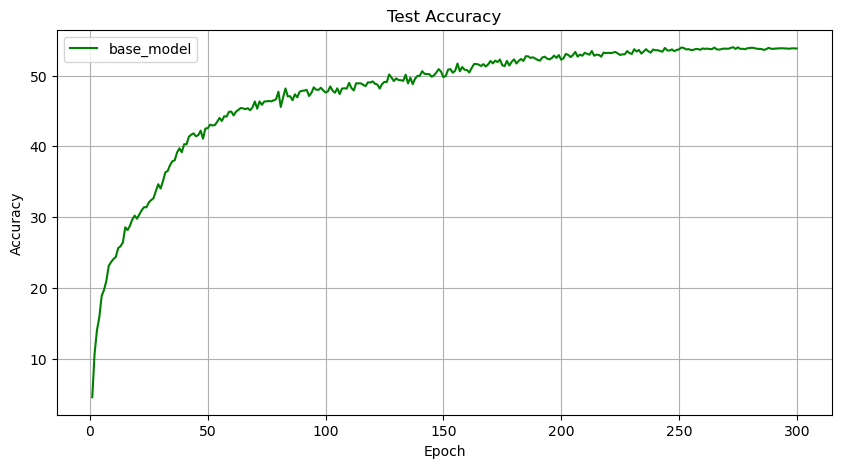

In [9]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-100/vit_base/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(base_model)}")
f.data_loader.load_checkpoint(base_model,base_model_load_path)
base_model_acc=test(base_model,test_loader,'cuda')
base_model_loss_list,base_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/vit_base/loss_and_accuracy')
f.plotter.plot_loss_accuracy(base_model_loss_list,base_model_accuracy_list,'base_model')

Total parameters:246404
Test Accuracy: 58.13%


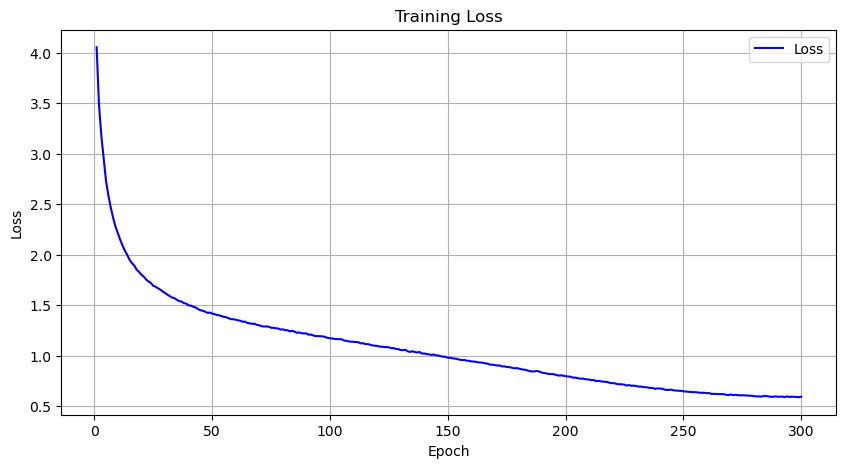

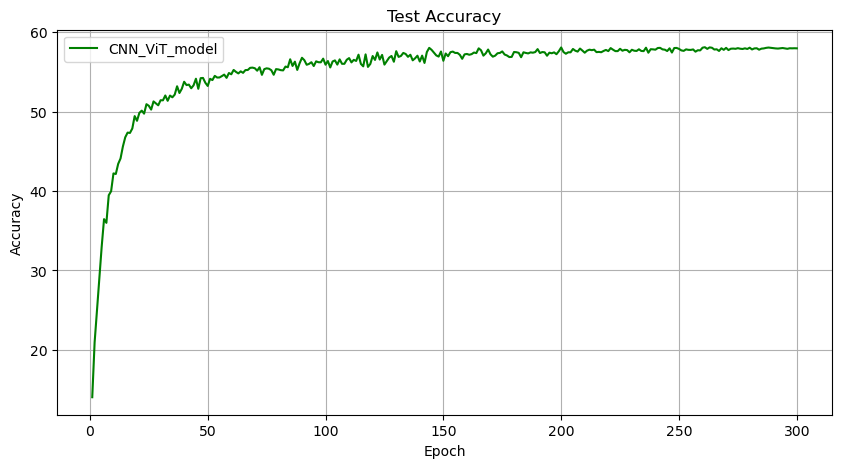

In [11]:
CNN_ViT_model = CNN_ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cpu")#cpu for feature visualisation
CNN_ViT_model_load_path = "save_model/cifar-100/CNN_ViT2/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(CNN_ViT_model)}")
f.data_loader.load_checkpoint(CNN_ViT_model,CNN_ViT_model_load_path)
CNN_ViT_model_acc=test(CNN_ViT_model,test_loader,'cuda')
CNN_ViT_model_loss_list,CNN_ViT_model_accuracy_list=f.data_loader.load_lists_from_file('save_model/cifar-100/CNN_ViT2/loss_and_accuracy')
f.plotter.plot_loss_accuracy(CNN_ViT_model_loss_list,CNN_ViT_model_accuracy_list,'CNN_ViT_model')

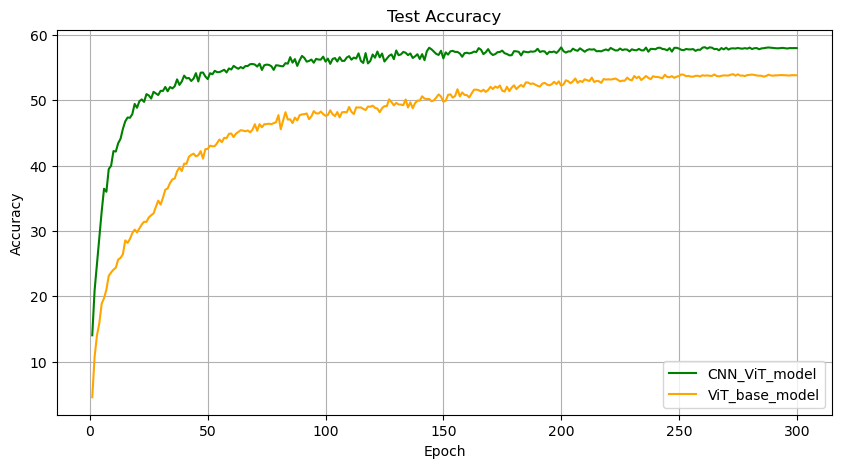

In [12]:
f.plotter.plot_accuracy_comparison(CNN_ViT_model_accuracy_list,base_model_accuracy_list,'CNN_ViT_model','ViT_base_model')

In [ ]:
f.data_loader.create_comparison_table([base_model,CNN_ViT_model],[base_model_acc,CNN_ViT_model_acc])

In [ ]:
base_model.to('cpu')
x,img=f.data_loader.get_random_image('bee')
plot_feature_maps(base_model,x,img,device='cpu')

In [ ]:
CNN_ViT_model.to('cpu')
plot_feature_maps(CNN_ViT_model,x,img,device='cpu')

Knowledge distillation

Teacher logits based KD

Total parameters:408740


Test Accuracy: 52.09%


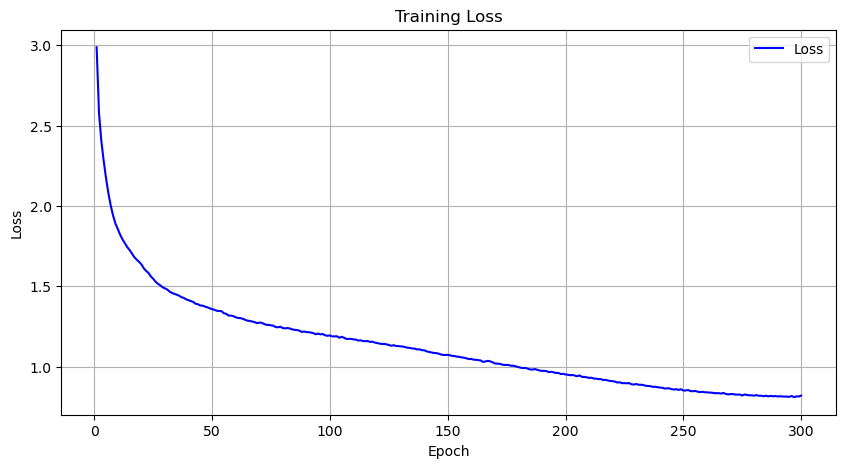

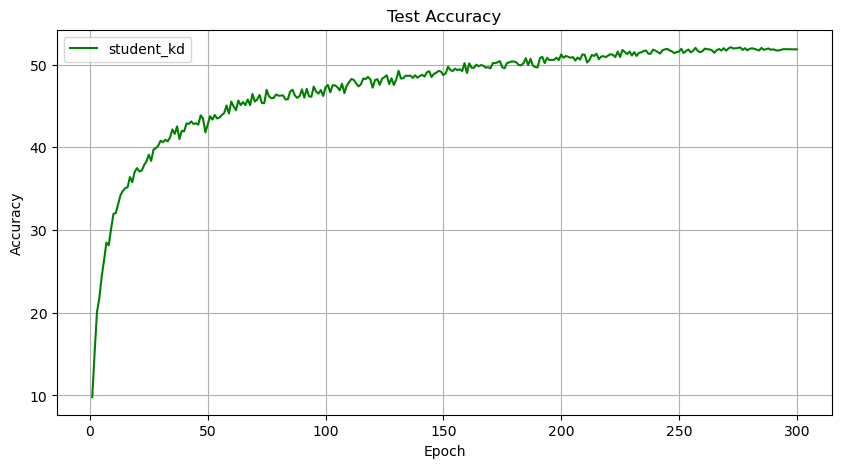

In [8]:
student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    # feature_distill=True
).to("cuda")
student_load_path = 'save_model/cifar-100/vit_featurekd/best_model.pt'
print(f"Total parameters:{f.helpers.count_parameters(student_kd)}")
f.data_loader.load_checkpoint(student_kd,student_load_path)
student_kd_acc = test(student_kd,test_loader,'cuda')
student_kd_loss_list,student_kd_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-100/vit_featurekd/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_kd_loss_list,student_kd_accuracy_list,'student_kd')

Total parameters:408740
Test Accuracy: 51.27%


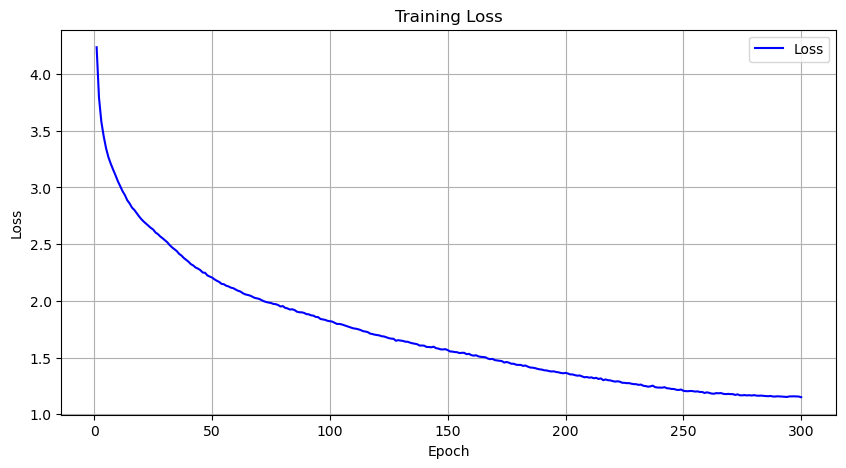

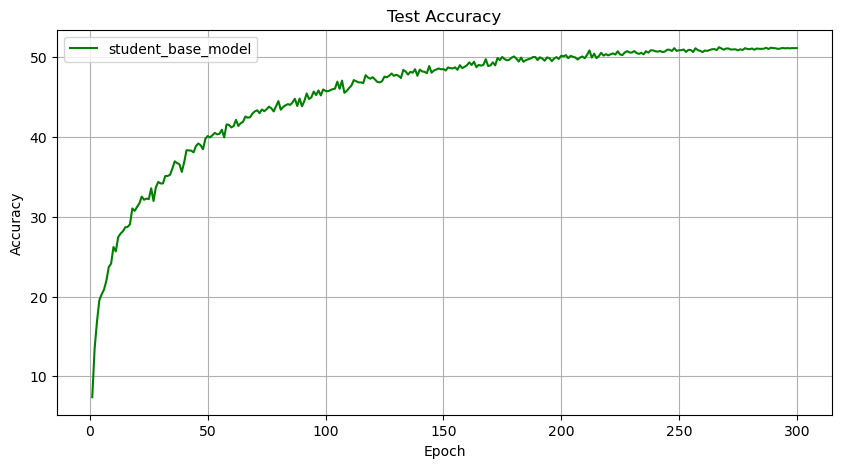

In [10]:
student_base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
).to("cuda")
student_base_load_path = "save_model/cifar-100/vit_16_student_base_cifar-100/best_model.pt"
print(f"Total parameters:{f.helpers.count_parameters(student_base_model)}")
f.data_loader.load_checkpoint(student_base_model,student_base_load_path)
student_base_model_acc = test(student_base_model,test_loader,'cuda')
student_base_model_loss_list,student_base_model_accuracy_list = f.data_loader.load_lists_from_file('save_model/cifar-100/vit_16_student_base_cifar-100/loss_and_accuracy')
f.plotter.plot_loss_accuracy(student_base_model_loss_list,student_base_model_accuracy_list,'student_base_model')


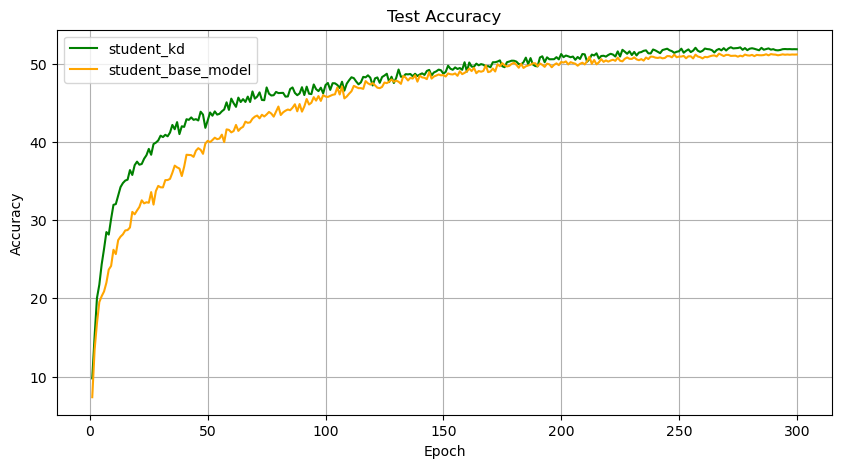

In [13]:
f.plotter.plot_accuracy_comparison(student_kd_accuracy_list,student_base_model_accuracy_list,'student_kd','student_base_model')

In [14]:
f.data_loader.create_comparison_table([student_kd,student_base_model],[student_kd_acc,student_base_model_acc])

,model_name,num_params,accuracy,depth,num_heads,num_cnn_layers
0,ViT,408740,52.09,3,6,0
1,ViT,408740,51.27,3,6,0


In [ ]:
#Add inference time comparison and co2 eq 